In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score

 
# Load red wine data.
data = pd.read_csv('winequality-white.csv', sep=';')

data.shape


(4898, 12)

In [4]:
data.describe()  

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


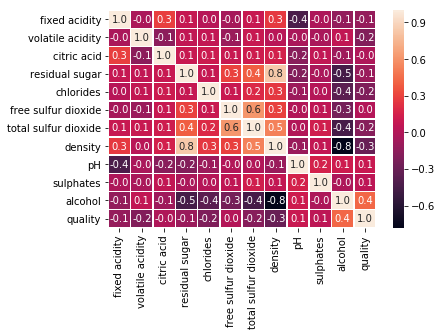

In [5]:
y = data.quality
X = data.drop('quality', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45, stratify=y)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

import seaborn as sns
corr_matrx = data.corr()
sns.heatmap(corr_matrx, annot=True, linewidths=.5, fmt= '.1f')


In [6]:
X_train_scaled.mean(axis=0)

array([ -4.55197107e-16,  -5.88491878e-16,  -3.35503844e-16,
         4.35248230e-17,  -3.52732420e-16,  -9.97443861e-17,
         2.24878252e-16,   5.79424206e-15,   7.84353581e-16,
         3.25529405e-16,   2.97419624e-16])

In [7]:
X_train_scaled.std(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [8]:
X_test_scaled = scaler.transform(X_test)

In [9]:
X_test_scaled.mean(axis=0)

array([-0.00775451,  0.00223027,  0.00200592, -0.01087553,  0.06336785,
       -0.0603751 , -0.02978579, -0.00844179, -0.01762965,  0.07464462,
        0.00846429])

In [10]:
X_test_scaled.std(axis=0)

array([ 0.93812851,  1.07007524,  0.94576776,  0.98267673,  1.08512967,
        0.95732515,  0.97569557,  0.96484176,  0.96450746,  0.99580043,
        0.9937025 ])

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train_scaled, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
fixed acidity,0.055164
volatile acidity,-0.180596
citric acid,0.012688
residual sugar,0.432738
chlorides,-0.004992
free sulfur dioxide,0.055122
total sulfur dioxide,-0.012695
density,-0.466130
pH,0.112305
sulphates,0.076514


In [13]:
y_pred = regressor.predict(X_test_scaled)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
3013,6,6.419995
2313,7,6.606466
2646,7,6.371804
4023,6,6.387059
787,6,5.242768
4472,5,5.963916
958,7,5.883590
782,7,6.150315
870,5,5.164381
1865,6,5.453942


In [14]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 0.578863244995
Mean Squared Error: 0.558421019599
Root Mean Squared Error: 0.747275731975


In [15]:
#k-Fold cross validation for improving our model
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train,
                             y = y_train, cv = 10)
#we can see model's average accuracy
accuracies.mean()

0.26671958711871718

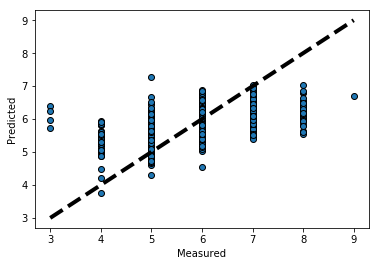

In [16]:
import matplotlib.pyplot as pyplt
#pyplt.scatter(y_pred, y_test,  color='black')

fig, ax = pyplt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
pyplt.show()

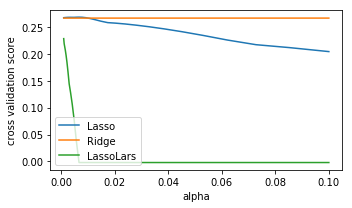

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso, LassoLars, LinearRegression
import numpy as np
from matplotlib import pyplot as plt

alphas = np.logspace(-3, -1, 30)

plt.figure(figsize=(5, 3))

for Model in [Lasso, Ridge, LassoLars]:
    scores = [cross_val_score(Model(alpha), X_train_scaled, y_train, cv=10).mean()
            for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

In [18]:
ridger = Ridge(alpha=1.0, solver = 'sag')
ridger.fit(X_train_scaled, y_train) 
y_pred = ridger.predict(X_test_scaled)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 0.578835390717
Mean Squared Error: 0.55838857183
Root Mean Squared Error: 0.747254020953


In [27]:
from sklearn import linear_model
lassy = linear_model.Lasso(alpha=0.001)
lassy.fit(X_train_scaled, y_train)
y_pred = lassy.predict(X_test_scaled)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 0.578690091537
Mean Squared Error: 0.558144362584
Root Mean Squared Error: 0.747090598645


In [23]:
laslars = LassoLars(alpha=0.0001)
laslars.fit(X_train_scaled, y_train)
y_pred = laslars.predict(X_test_scaled)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 0.578689151678
Mean Squared Error: 0.558131210573
Root Mean Squared Error: 0.747081796441


In [24]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(random_state=0)
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 0.670947276307
Mean Squared Error: 0.785006448064
Root Mean Squared Error: 0.886005896179
